<a href="https://colab.research.google.com/github/thinnarat007/python_dataviz2024/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Data_viz2024_Data'


In [4]:
movie_file_path = os.path.join(path,'IMDb Movies India.csv')
print(movie_file_path )

/content/drive/MyDrive/Data_viz2024_Data/IMDb Movies India.csv


In [5]:
data_in= pd.read_csv(movie_file_path,encoding='latin-1')
data_in.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
# Group by Director and calculate the mean rating for each director
mean_rating_by_director = data_in.groupby('Director')['Rating'].mean()

# Function to fill NaN values in Rating column using director's mean rating
def fill_rating_with_director_mean(row):
    if pd.isnull(row['Rating']):
        director = row['Director']
        if director in mean_rating_by_director:
            return mean_rating_by_director[director]
    return row['Rating']

# Apply the function to fill NaN values in Rating column
data_in['Rating'] = data_in.apply(fill_rating_with_director_mean, axis=1)

# Fill any remaining NaN values in Rating with overall mean rating
data_in['Rating'].fillna(data_in['Rating'].mean(), inplace=True)



In [7]:
df1 = data_in[data_in[['Name','Genre','Director','Rating']].notna().all(axis=1)][['Name','Genre','Director','Rating']]

In [8]:
df1

,Name,Genre,Director,Rating
0,,Drama,J.S. Randhawa,5.700000
1,#Gadhvi (He thought he was Gandhi),Drama,Gaurav Bakshi,7.000000
2,#Homecoming,"Drama, Musical",Soumyajit Majumdar,5.844000
3,#Yaaram,"Comedy, Romance",Ovais Khan,4.400000
4,...And Once Again,Drama,Amol Palekar,6.333333
...,...,...,...,...
15503,Zulm Ki Zanjeer,"Action, Crime, Drama",S.P. Muthuraman,5.800000
15504,Zulm Ko Jala Doonga,Action,Mahendra Shah,4.600000
15505,Zulmi,"Action, Drama",Kuku Kohli,4.500000
15506,Zulmi Raj,Action,Kiran Thej,5.844000


In [9]:
# Kanti Shah
# Hrishikesh Mukherjee
# Babubhai Mistry     สร้างหนังกี่เรื่อง เป็นประเภทไหนบ้าง

# Filter the DataFrame to include only movies directed by the specified directors.
directors_of_interest = ['Kanti Shah', 'Hrishikesh Mukherjee', 'Babubhai Mistry']
movies_by_directors = df1[df1['Director'].isin(directors_of_interest)]

# Group by Director and Genre, then count the number of movies in each genre.
movie_counts_by_director_and_genre = movies_by_directors.groupby(['Director', 'Genre'])['Name'].count().reset_index()

# Rename the 'Name' column to 'Number_of_Movies' for clarity.
movie_counts_by_director_and_genre = movie_counts_by_director_and_genre.rename(columns={'Name': 'Number_of_Movies'})

# Print the results.
movie_counts_by_director_and_genre


,Director,Genre,Number_of_Movies
0,Babubhai Mistry,Action,2
1,Babubhai Mistry,"Action, Adventure",1
2,Babubhai Mistry,"Action, Adventure, Comedy",1
3,Babubhai Mistry,"Action, Adventure, Drama",2
4,Babubhai Mistry,"Action, Adventure, Fantasy",2
5,Babubhai Mistry,"Action, Comedy, Crime",1
6,Babubhai Mistry,"Action, Crime",1
7,Babubhai Mistry,"Action, Fantasy",1
8,Babubhai Mistry,"Action, History",1
9,Babubhai Mistry,"Adventure, Drama",1


In [10]:
# Create a new DataFrame with expanded rows for each genre
new_rows = []
for index, row in movie_counts_by_director_and_genre.iterrows():
    genres = row['Genre'].split(', ')
    for genre in genres:
        new_rows.append([row['Director'], genre, row['Number_of_Movies']])

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(new_rows, columns=['Director', 'Genre', 'Number_of_Movies'])

# Display the new DataFrame
print(expanded_df)



            Director      Genre  Number_of_Movies
0    Babubhai Mistry     Action                 2
1    Babubhai Mistry     Action                 1
2    Babubhai Mistry  Adventure                 1
3    Babubhai Mistry     Action                 1
4    Babubhai Mistry  Adventure                 1
..               ...        ...               ...
117       Kanti Shah      Drama                 1
118       Kanti Shah    Romance                 1
119       Kanti Shah     Horror                12
120       Kanti Shah    Romance                 2
121       Kanti Shah   Thriller                 4

[122 rows x 3 columns]


In [11]:
# Group by 'Director' and 'Genre' and sum the 'Number_of_Movies'
aggregated_df = expanded_df.groupby(['Director', 'Genre'])['Number_of_Movies'].sum().reset_index()

# Display the aggregated DataFrame
print(aggregated_df)


                Director      Genre  Number_of_Movies
0        Babubhai Mistry     Action                14
1        Babubhai Mistry  Adventure                18
2        Babubhai Mistry     Comedy                 3
3        Babubhai Mistry      Crime                 3
4        Babubhai Mistry      Drama                17
5        Babubhai Mistry     Family                 2
6        Babubhai Mistry    Fantasy                19
7        Babubhai Mistry    History                 4
8        Babubhai Mistry    Romance                 1
9        Babubhai Mistry   Thriller                 1
10  Hrishikesh Mukherjee     Action                 1
11  Hrishikesh Mukherjee     Comedy                16
12  Hrishikesh Mukherjee      Crime                 1
13  Hrishikesh Mukherjee      Drama                32
14  Hrishikesh Mukherjee     Family                 7
15  Hrishikesh Mukherjee    Fantasy                 1
16  Hrishikesh Mukherjee    Musical                 7
17  Hrishikesh Mukherjee    

In [12]:
# Filter the dataframe to include only rows where the Genre contains 'Drama', 'Action', 'Fantasy', or 'Comedy'.
df_filtered = df1[df1['Genre'].str.contains('Drama|Action|Fantasy|Comedy|Horror', case=False, na=False)]

# Display the filtered dataframe.
df_filtered


,Name,Genre,Director,Rating
0,,Drama,J.S. Randhawa,5.700000
1,#Gadhvi (He thought he was Gandhi),Drama,Gaurav Bakshi,7.000000
2,#Homecoming,"Drama, Musical",Soumyajit Majumdar,5.844000
3,#Yaaram,"Comedy, Romance",Ovais Khan,4.400000
4,...And Once Again,Drama,Amol Palekar,6.333333
...,...,...,...,...
15503,Zulm Ki Zanjeer,"Action, Crime, Drama",S.P. Muthuraman,5.800000
15504,Zulm Ko Jala Doonga,Action,Mahendra Shah,4.600000
15505,Zulmi,"Action, Drama",Kuku Kohli,4.500000
15506,Zulmi Raj,Action,Kiran Thej,5.844000


In [13]:
# Group by Director and count the number of movies
director_counts = df_filtered.groupby('Director')['Name'].count()

# Sort the counts in descending order
director_counts_sorted = director_counts.sort_values(ascending=False)

# Display the sorted counts
director_counts_sorted.head(10)


,Name
Director,
Kanti Shah,51
Mahesh Bhatt,46
David Dhawan,44
Hrishikesh Mukherjee,39
Babubhai Mistry,38
Ram Gopal Varma,36
Shibu Mitra,34
B.R. Ishara,34
Rama Rao Tatineni,34


In [14]:
# prompt: เลือก หนังที่ Kanti Shah,Hrishikesh Mukherjee,Babubhai Mistry สร้าง

directors_to_filter = ['Kanti Shah', 'Mahesh Bhatt','David Dhawan','Hrishikesh Mukherjee']
df_selected_directors = df_filtered[df_filtered['Director'].isin(directors_to_filter)]
df_selected_directors


,Name,Genre,Director,Rating
227,Aag Andhi Aur Toofan,"Action, Thriller",Kanti Shah,3.100000
229,Aag Aur Chingari,Action,Kanti Shah,4.100000
239,Aag Ka Gola,"Action, Drama",David Dhawan,4.800000
242,Aag Ka Toofaan,Action,Kanti Shah,4.800000
244,Aag Ke Sholay,Action,Kanti Shah,4.997368
...,...,...,...,...
15186,Yaraana,"Action, Drama, Musical",David Dhawan,4.700000
15232,Yeh Hai Jalwa,"Comedy, Drama, Romance",David Dhawan,4.700000
15235,Yeh Hai Mumbai Meri Jaan,"Action, Comedy, Romance",Mahesh Bhatt,4.400000
15341,Zakhm,Drama,Mahesh Bhatt,7.900000


In [15]:
import pandas as pd

# Create a new DataFrame with only the relevant columns.
df_genres = df_selected_directors[['Director', 'Genre']].copy()

# Define a function to extract and categorize genres.
def categorize_genre(genre_str):
    genres = []
    if 'Drama' in genre_str:
        genres.append('Drama')
    if 'Action' in genre_str:
        genres.append('Action')
    if 'Fantasy' in genre_str:
        genres.append('Fantasy')
    if 'Comedy' in genre_str:
        genres.append('Comedy')
    if 'Horror' in genre_str:
        genres.append('Horror')
    return genres


# Apply the function to create a list of genres for each movie.
df_genres['Genres_List'] = df_genres['Genre'].apply(categorize_genre)

# Explode the list of genres to create a new row for each genre.
df_genres_exploded = df_genres.explode('Genres_List')

# Group by director and genre to count the number of movies in each genre.
df_director_genre_counts = df_genres_exploded.groupby(['Director', 'Genres_List'])['Genres_List'].count().reset_index(name='Count')

# Display the result.
print(df_director_genre_counts)



                Director Genres_List  Count
0           David Dhawan      Action     23
1           David Dhawan      Comedy     37
2           David Dhawan       Drama     22
3   Hrishikesh Mukherjee      Action      1
4   Hrishikesh Mukherjee      Comedy     16
5   Hrishikesh Mukherjee       Drama     32
6   Hrishikesh Mukherjee     Fantasy      1
7             Kanti Shah      Action     30
8             Kanti Shah      Comedy      2
9             Kanti Shah       Drama     12
10            Kanti Shah     Fantasy      1
11            Kanti Shah      Horror     12
12          Mahesh Bhatt      Action     21
13          Mahesh Bhatt      Comedy      5
14          Mahesh Bhatt       Drama     37
15          Mahesh Bhatt      Horror      1


In [16]:
df_director_genre_counts['Count'].sum()

253

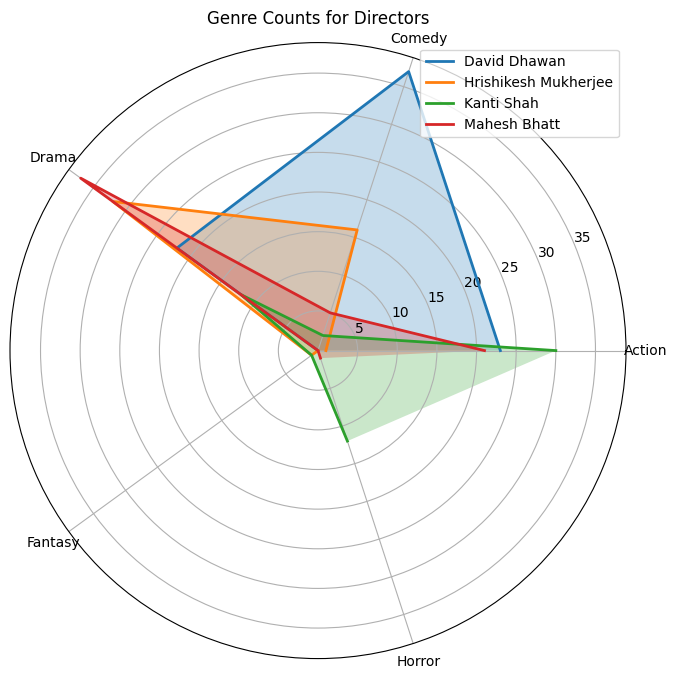

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of unique genres
genres = df_director_genre_counts['Genres_List'].unique()

# Create a dictionary to store the genre counts for each director
director_genre_counts = {}
for director in df_director_genre_counts['Director'].unique():
    director_genre_counts[director] = [0] * len(genres)

# Fill in the genre counts for each director
for index, row in df_director_genre_counts.iterrows():
    director = row['Director']
    genre = row['Genres_List']
    count = row['Count']
    genre_index = np.where(genres == genre)[0][0]
    director_genre_counts[director][genre_index] = count

# Create the spider chart
labels = genres
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for director, counts in director_genre_counts.items():
    ax.plot(angles, counts, linewidth=2, label=director)
    ax.fill(angles + [angles[0]], counts + [counts[0]], alpha=0.25)

plt.xticks(angles, labels)
plt.legend(loc='upper right')
plt.title('Genre Counts for Directors')
plt.show()


In [18]:
# prompt: จากกราฟด้านบน สร้างตาราง แสงสรุปผล

import pandas as pd
# Create a pivot table to summarize the results
summary_table = pd.pivot_table(df_director_genre_counts, values='Count', index='Director', columns='Genres_List', aggfunc='sum', fill_value=0)

# Display the summary table
summary_table


Genres_List,Action,Comedy,Drama,Fantasy,Horror
Director,,,,,
David Dhawan,23,37,22,0,0
Hrishikesh Mukherjee,1,16,32,1,0
Kanti Shah,30,2,12,1,12
Mahesh Bhatt,21,5,37,0,1


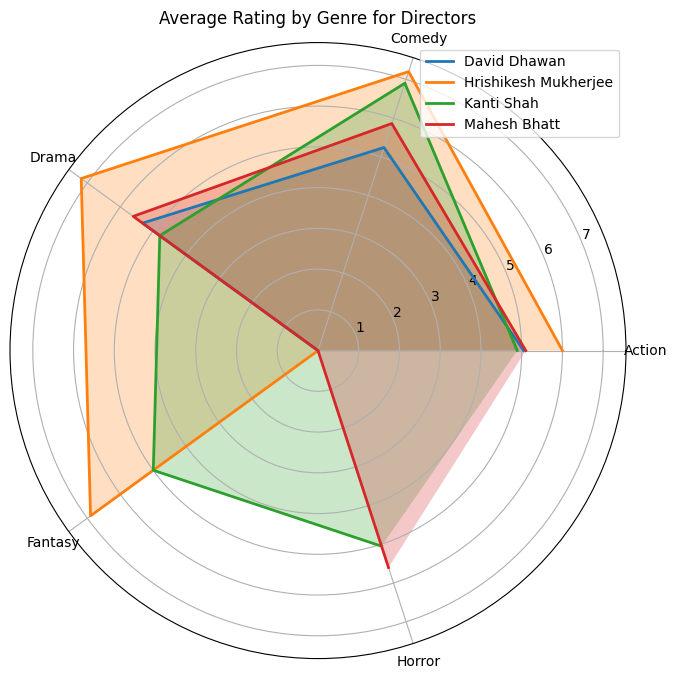

In [19]:
# prompt: สร้าง spider chart จาก df_director_genre_counts โดยรอบเป็นผู้กำกับ ด้านในเป็นประเภททั้งสี่ แสดงเรตติ้งเฉลี่ย

import matplotlib.pyplot as plt
import numpy as np

# Create a new DataFrame with only the relevant columns.
df_genres_rating = df_selected_directors[['Director', 'Genre', 'Rating']].copy()

# Apply the function to create a list of genres for each movie.
df_genres_rating['Genres_List'] = df_genres_rating['Genre'].apply(categorize_genre)

# Explode the list of genres to create a new row for each genre.
df_genres_rating_exploded = df_genres_rating.explode('Genres_List')

# Group by director and genre to get the average rating for each genre.
df_director_genre_avg_rating = df_genres_rating_exploded.groupby(['Director', 'Genres_List'])['Rating'].mean().reset_index(name='Avg_Rating')

# Create a list of unique genres
genres = df_director_genre_avg_rating['Genres_List'].unique()

# Create a dictionary to store the genre counts for each director
director_genre_avg_ratings = {}
for director in df_director_genre_avg_rating['Director'].unique():
    director_genre_avg_ratings[director] = [0] * len(genres)

# Fill in the genre counts for each director
for index, row in df_director_genre_avg_rating.iterrows():
    director = row['Director']
    genre = row['Genres_List']
    avg_rating = row['Avg_Rating']
    genre_index = np.where(genres == genre)[0][0]
    director_genre_avg_ratings[director][genre_index] = avg_rating

# Create the spider chart
labels = genres
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for director, avg_ratings in director_genre_avg_ratings.items():
    ax.plot(angles, avg_ratings, linewidth=2, label=director)
    ax.fill(angles + [angles[0]], avg_ratings + [avg_ratings[0]], alpha=0.25)

plt.xticks(angles, labels)
plt.legend(loc='upper right')
plt.title('Average Rating by Genre for Directors')
plt.show()



In [20]:
# prompt: จากกราฟด้านบน สร้างตารางสรุปผลใหม่ สำหรับกราฟนี้เท่านั้น

import pandas as pd
# Create a pivot table to summarize the results
summary_table_avg_rating = pd.pivot_table(df_director_genre_avg_rating, values='Avg_Rating', index='Director', columns='Genres_List', aggfunc='mean', fill_value=0)

# Display the summary table
summary_table_avg_rating


Genres_List,Action,Comedy,Drama,Fantasy,Horror
Director,,,,,
David Dhawan,5.047826,5.240352,5.322727,0.000000,0.000000
Hrishikesh Mukherjee,6.000000,7.200000,7.184375,6.900000,0.000000
Kanti Shah,4.889474,6.900000,4.799342,4.997368,5.048904
Mahesh Bhatt,5.100000,5.860000,5.605405,0.000000,5.600000
